# Bright SNe lightcurves
### To run this notebook, please [follow the instructions](https://lasair-lsst.readthedocs.io/en/main/core_functions/python-notebooks.html) or else it won`t work.
The instructions are at https://lasair-lsst.readthedocs.io/en/main/core_functions/python-notebooks.html

The purpose of this notebook is to grab some bright supernovae and plot them.

In [31]:
endpoint = "https://lasair-lsst.lsst.ac.uk/api"

In [32]:
import sys, time
import matplotlib.pyplot as plt
import numpy as np
from lasair import LasairError, lasair_client as lasair
import settings

In [33]:
L = lasair(settings.API_TOKEN, endpoint=endpoint)

In [34]:
# Just join the objects table and the sherlock_classifications table, just
# pulling out the objectId.
rows = L.query(
    "objects.diaObjectId AS objectId",
    'objects, sherlock_classifications',
    """ sherlock_classifications.classification = "SN"
        AND objects.g_psfFlux > 2000 AND objects.r_psfFlux > 2000
        AND objects.nSources > 1 
    """,
    limit=10)
objectIds = [row['objectId'] for row in rows]
print(objectIds)

[3521874258609307650]


### Plot lightcurve function

In [35]:
bandColors = {'u': '#9900cc', 'g': '#3366ff', 'r':'#33cc33', 'i':'#ffcc00', 'z':'#ff0000', 'y':'#cc6600'}

def plotLC(objectId, diaSources):
    mjd_now = time.time()/86400 + 40587.0
    for band,color in bandColors.items():
        since = []
        magpsf = []
        sigmapsf = []
        for ds in diaSources:
            if ds['band'] == band:
                since.append(ds['midpointMjdTai'] - mjd_now)
                magpsf.append(ds['psfFlux'])
                sigmapsf.append(ds['psfFluxErr'])
        plt.errorbar(since, magpsf, yerr=sigmapsf, c=color)
        plt.xlabel("days before %.2f" % mjd_now)
        plt.ylabel("psf mag")
        plt.title('https://lasair-lsst.lsst.ac.uk/objects/%s' % objectId)
    plt.gca().invert_yaxis()
    plt.show()

### Grab and plot the lightcurves

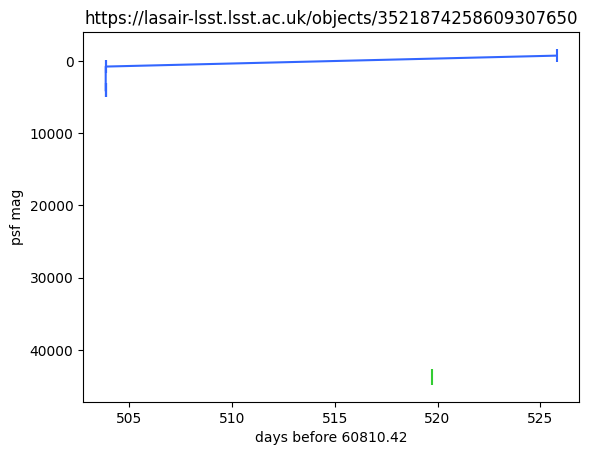

In [36]:
for obj in objectIds:
    lc = L.object(obj, lasair_added=False)
    plotLC(obj, lc['diaSources'])